In [1]:
import h5py
import numpy as np
import pandas as pd

# Function to explore and extract data from an .h5 file and return a DataFrame
def explore_h5_file(file_path):
    with h5py.File(file_path, 'r') as h5file:
        # Explore structure
        structure = {}
        h5file.visititems(lambda name, obj: structure.update({name: obj.shape if isinstance(obj, h5py.Dataset) else None}))
        print(f"Structure of {file_path}:\n", structure)
        
        # Extract data
        data_values = h5file['df/block0_values'][:].astype(np.float64)  # Convert to float64 to prevent overflow
        row_labels = h5file['df/axis1'][:]
        col_labels = h5file['df/block0_items'][:]
        
        # Convert byte strings to normal strings
        col_labels = [label.decode('utf-8') if isinstance(label, bytes) else label for label in col_labels]
        
        # Reconstruct DataFrame
        df = pd.DataFrame(data_values, columns=col_labels, index=row_labels)
        
    return df

# Example usage
file_path = 'IR_data/2021-08-07-0004.h5'
df = explore_h5_file(file_path)
print(df.head())

Structure of IR_data/2021-08-07-0004.h5:
 {'df': None, 'df/axis0': (768,), 'df/axis1': (86400,), 'df/block0_items': (768,), 'df/block0_values': (86400, 768)}
                       mean000    mean001    mean002    mean003    mean004  \
1628294400000000000  17.828125  17.796875  18.468750  18.515625  19.625000   
1628294401000000000  17.796875  17.234375  18.640625  18.546875  18.203125   
1628294402000000000  17.953125  17.531250  18.453125  17.812500  18.953125   
1628294403000000000  18.031250  15.750000  17.718750  18.625000  19.046875   
1628294404000000000  17.500000  17.968750  18.312500  17.750000  18.875000   

                       mean005    mean006    mean007    mean008    mean009  \
1628294400000000000  19.578125  20.109375  19.312500  19.218750  18.828125   
1628294401000000000  17.890625  18.687500  18.437500  19.546875  18.640625   
1628294402000000000  18.328125  18.734375  18.625000  19.484375  18.671875   
1628294403000000000  18.375000  19.093750  19.015625  19.5000

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [3]:
csv_data = pd.read_csv('pressure_injury(Dis-Organized Dataset).csv')

# Correct date format: %d-%m-%Y
csv_data['date'] = pd.to_datetime(csv_data['date'], format="%d-%m-%Y %H:%M")

csv_data.set_index('date', inplace=True)
csv_data.head(3)


C:\Users\Personal\AppData\Local\Temp\ipykernel_15788\3905292426.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv('pressure_injury(Dis-Organized Dataset).csv')


,score,std,label_num,IR_file
date,,,,
2021-03-30 09:00:00,0.000000,0.000000,0,NaN
2021-03-30 09:01:00,0.000243,0.000278,0,NaN
2021-03-30 09:02:00,0.000486,0.000556,0,NaN


In [4]:
def load_h5_data(file_path):
    try:
        df = pd.read_hdf(file_path, 'df')
        return df
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

# Extract Features
def extract_features(h5_data):
    if h5_data is not None:
        daily_avg_temp = h5_data.mean(axis=1)
        daily_avg_temp
        if not isinstance(daily_avg_temp.index, pd.DatetimeIndex):
            daily_avg_temp.index = pd.to_datetime(daily_avg_temp.index)
        return daily_avg_temp.resample('D').mean()
    return None

# Mapping Dates to File Paths
h5_files = {
        '2021-08-07': 'IR_data/2021-08-07-0004.h5',
    '2021-08-08': 'IR_data/2021-08-08-0004.h5',
    '2021-08-09': 'IR_data/2021-08-09-0004.h5',
    '2021-08-10': 'IR_data/2021-08-10-0004.h5',
    '2021-08-11': 'IR_data/2021-08-11-0004.h5',
    '2021-08-12': 'IR_data/2021-08-12-0004.h5',
    '2021-08-13': 'IR_data/2021-08-13-0004.h5',
    '2021-08-14': 'IR_data/2021-08-14-0004.h5',
    '2021-08-15': 'IR_data/2021-08-15-0004.h5',
    '2021-08-16': 'IR_data/2021-08-16-0004.h5',
    '2021-08-17': 'IR_data/2021-08-17-0004.h5',
    '2021-08-18': 'IR_data/2021-08-18-0004.h5',
    '2021-08-19': 'IR_data/2021-08-19-0004.h5',
    '2021-08-20': 'IR_data/2021-08-20-0004.h5',
    '2021-08-21': 'IR_data/2021-08-21-0004.h5',
    '2021-08-22': 'IR_data/2021-08-22-0004.h5',
    '2021-08-23': 'IR_data/2021-08-23-0004.h5',
    '2021-08-24': 'IR_data/2021-08-24-0004.h5',
    '2021-08-25': 'IR_data/2021-08-25-0004.h5',
    '2021-08-26': 'IR_data/2021-08-26-0004.h5',
    '2021-08-27': 'IR_data/2021-08-27-0004.h5',
    '2021-08-28': 'IR_data/2021-08-28-0004.h5',
    '2021-08-29': 'IR_data/2021-08-29-0004.h5',
    '2021-08-30': 'IR_data/2021-08-30-0004.h5',
    '2021-08-31': 'IR_data/2021-08-31-0004.h5',
    '2021-09-01': 'IR_data/2021-09-01-0004.h5',
    '2021-09-02': 'IR_data/2021-09-02-0004.h5',
    '2021-09-03': 'IR_data/2021-09-03-0004.h5',
    '2021-09-04': 'IR_data/2021-09-04-0004.h5',
    '2021-09-05': 'IR_data/2021-09-05-0004.h5',
    '2021-09-06': 'IR_data/2021-09-06-0004.h5',
    '2021-09-07': 'IR_data/2021-09-07-0004.h5',
    '2021-09-08': 'IR_data/2021-09-08-0004.h5',
    '2021-09-09': 'IR_data/2021-09-09-0004.h5',
    '2021-09-10': 'IR_data/2021-09-10-0004.h5',
    '2021-09-11': 'IR_data/2021-09-11-0004.h5',
    '2021-09-12': 'IR_data/2021-09-12-0004.h5',
    '2021-09-13': 'IR_data/2021-09-13-0004.h5',
    '2021-09-14': 'IR_data/2021-09-14-0004.h5',
    '2021-09-15': 'IR_data/2021-09-15-0004.h5',
    '2021-09-16': 'IR_data/2021-09-16-0004.h5',
    '2021-09-17': 'IR_data/2021-09-17-0004.h5',
    '2021-09-18': 'IR_data/2021-09-18-0004.h5',
    '2021-09-19': 'IR_data/2021-09-19-0004.h5',
    '2021-09-20': 'IR_data/2021-09-20-0004.h5',
}

features = []
for date, file_path in h5_files.items():
    h5_data = load_h5_data(file_path)
    temp_features = extract_features(h5_data)
    if temp_features is not None:
        temp_features.name = date
        features.append(temp_features)

# Combine Features
if features:
    combined_features = pd.concat(features, axis=1).T
    training_data = csv_data.join(combined_features)
    print(combined_features.head())
else:
    print("No features were extracted.")

            2021-08-07  2021-08-08  2021-08-09  2021-08-10  2021-08-11  \
2021-08-07   19.364075         NaN         NaN         NaN         NaN   
2021-08-08         NaN   18.762688         NaN         NaN         NaN   
2021-08-09         NaN         NaN   19.186729         NaN         NaN   
2021-08-10         NaN         NaN         NaN   19.216633         NaN   
2021-08-11         NaN         NaN         NaN         NaN   18.209993   

            2021-08-12  2021-08-13  2021-08-14  2021-08-15  2021-08-16  ...  \
2021-08-07         NaN         NaN         NaN         NaN         NaN  ...   
2021-08-08         NaN         NaN         NaN         NaN         NaN  ...   
2021-08-09         NaN         NaN         NaN         NaN         NaN  ...   
2021-08-10         NaN         NaN         NaN         NaN         NaN  ...   
2021-08-11         NaN         NaN         NaN         NaN         NaN  ...   

            2021-09-11  2021-09-12  2021-09-13  2021-09-14  2021-09-15  \
2021-0

In [5]:
X = training_data.drop(columns=['score']).reset_index(drop=True)
X = X.select_dtypes(include=[np.number])
X.columns = X.columns.astype(str)
y = training_data['score']

# Binarize the target variable for classification
y_binary = (y > 0).astype(int)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y_binary, shuffle=True)

# Train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
new_h5_data = load_h5_data('IR_data/2021-09-21-0004.h5')
new_features = extract_features(new_h5_data)
if isinstance(new_features, pd.Series):
    new_features = new_features.to_frame().T
new_features = new_features.reindex(columns=X_train.columns, fill_value=0)
new_score_prediction = model.predict(new_features)[0]

In [8]:
#Prediction
if new_score_prediction < 0:
    result = "worst"
elif 0 <= new_score_prediction <= 1:
    result = "no change"
elif new_score_prediction > 1:
    result = "better"
else:
    result = "undefined"

print(f"The condition is predicted to be: {result}")

The condition is predicted to be: worst


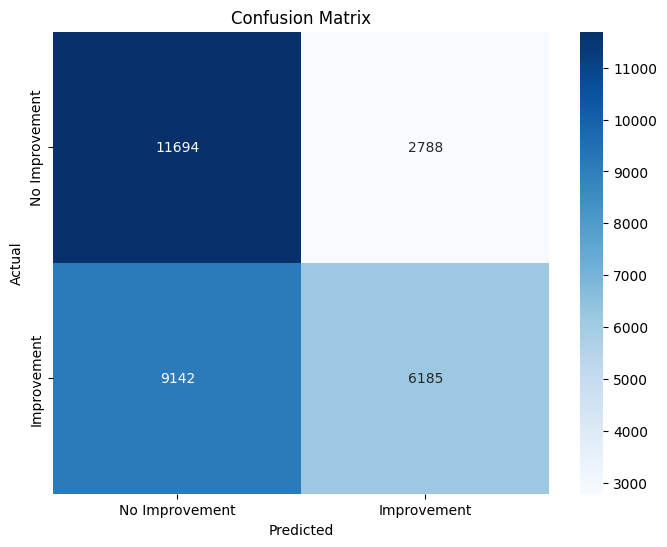

AUC-ROC Score: 0.6119
Accuracy: 0.5998


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, (y_train > 0).astype(int))

# Predict the binary classes for the test set
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Improvement', 'Improvement'], yticklabels=['No Improvement', 'Improvement'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print AUC-ROC and Accuracy
if len(np.unique(y_test_binary)) < 2:
    print("AUC-ROC cannot be calculated because only one class is present.")
else:
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    aucroc = roc_auc_score(y_test_binary, y_pred_proba)
    print(f"AUC-ROC Score: {aucroc:.4f}")

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")


In [10]:
classifier = RandomForestClassifier()
classifier.fit(X_train, (y_train > 0).astype(int))

# Checking class distribution in the test set
y_test_binary = (y_test > 0).astype(int)
print(f"Class distribution in y_test_binary: {np.bincount(y_test_binary)}")

if len(np.unique(y_test_binary)) < 2:
    print("AUC-ROC cannot be calculated because only one class is present.")
else:
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    aucroc = roc_auc_score(y_test_binary, y_pred_proba)
    print(f"AUC-ROC Score: {aucroc:.4f}")

    # Optionally, calculate other metrics
    accuracy = accuracy_score(y_test_binary, classifier.predict(X_test))

    print(f"Accuracy: {accuracy:.4f}")

Class distribution in y_test_binary: [14482 15327]
AUC-ROC Score: 0.6115
Accuracy: 0.5998
